In [122]:
# import libraries 

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import cv2
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76
from os import listdir
from os.path import isfile, join
import os

%matplotlib inline

# Let's first import necessary libraries. 
# We need sklearn for KMeans algorithm, matplotlib.pyplot for plotting graphs, numpy to work with arrays, 
# cv2 to work with image data, collections to use Counter to count values, 
# rgb2lab to convert RGB values and deltaE_cie76 to calculate similarity between colors.

In [104]:
# # This is to get the names of all the files in the desired directory
# # Here I assume that they are all images
# crop_images = os.listdir('crop')

# # Here I construct a list of relative path strings for each image
# crop_images = [f"crop/{file_name}" for file_name in crop_images]

# crop_images = [cv2.imread(file) for file in crop_images]

In [121]:
# # list contatining  all images
images=[] 
folder = "crop"                           

images_names = [print(filename) for filename in os.listdir(folder)]
img = [cv2.imread(str(file)) for file in folder]

# img=np.array([filename for filename in images_names]) 
# img=img.flatten()
# images.append(img)
# images[0]

"The type of this input is <class 'numpy.ndarray'>"

"The type of this input is <class 'numpy.ndarray'>"

"The type of this input is <class 'numpy.ndarray'>"

'Shape: (140, 213, 3)'

'Shape: (760, 298, 3)'

'Shape: (333, 330, 3)'

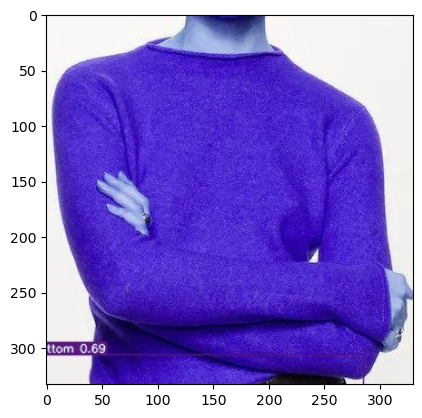

In [107]:
image0 = cv2.imread('crop/1.jpg')
image1 = cv2.imread('crop/2.jpg')
image2 = cv2.imread('crop/3.jpg')


display("The type of this input is {}".format(type(image0)))
display("The type of this input is {}".format(type(image1)))
display("The type of this input is {}".format(type(image2)))

display("Shape: {}".format(image0.shape))
display("Shape: {}".format(image1.shape))
display("Shape: {}".format(image2.shape))


plt.imshow(image0)
plt.imshow(image1)
plt.imshow(image2)


# ## Output
# # The type of this input is <class 'numpy.ndarray'>
# # Shape: (930, 750, 3)

# The first two values match the pixels of the image. 
# Third value is set to 3 as each pixel is represented as 
# a combination of three colors, Red, Blue and Green.

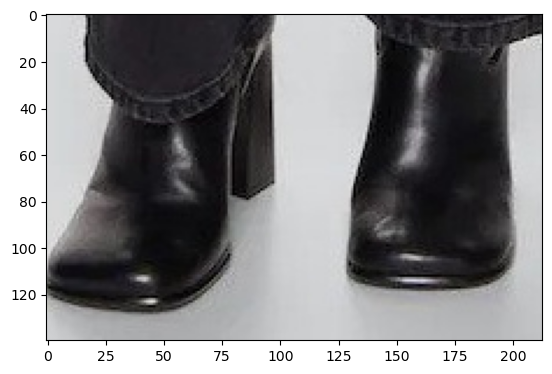

In [108]:
# The color of the image looks a bit off. 
# This is because, by default, OpenCV reads image in the sequence Blue Green Red (BGR). 
# Thus, to view the actual image we need to convert the rendering to Red Green Blue (RGB).

image = cv2.imread('crop/1.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)


# The method cvtColor allows us to convert the image rendering to a different color space. 
# To move from BGR color space to RGB, we use the method cv2.COLOR_BGR2RGB.

# image in gray

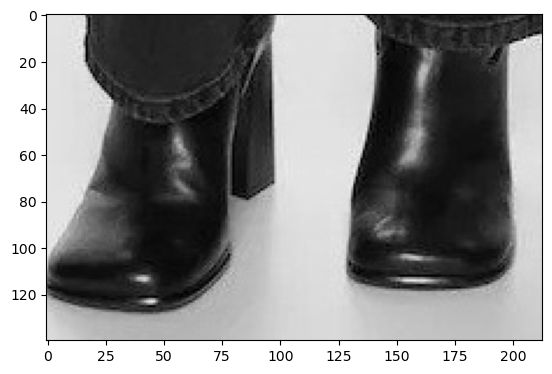

In [109]:
# In some situations, we might want to have black and white images. 
# In such cases, we can express images as Gray. 
# We now use the conversion space as cv2.COLOR_BGR2GRAY and show the output with the colormap as gray.

# ########################I don't think is our case

gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_image, cmap='gray')

In [110]:
image.shape

(140, 213, 3)

# re-scaling the image

In [111]:
# We can also resize the image to a given dimension. 
# We use the method resize provided by cv2. 
# The first argument is the image we want to resize, 
# and the second argument is the width and height defined within parentheses.

# resized_image = cv2.resize(image, (750,930)) #maintained the original, since we don't want to re-scale right now 
# plt.imshow(resized_image)

# color identification

In [112]:
# We’d first define a function that will convert RGB to hex so that we can use them as labels for our pie chart.
# On reading the color which is in RGB space, we return a string. {:02x} simply displays the hex value for the respective color.

def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

In [113]:
# KMeans expects flattened array as input during its fit method. 
# Thus, we need to reshape the image using numpy. 
# Then, we can apply KMeans to first fit and then predict on the image to get the results. 
# Then, the cluster colors are identified an arranged in the correct order. 
# We plot the colors as a pie chart.


def get_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

def get_colors(image, number_of_colors, show_chart):
    
    modified_image = cv2.resize(image, (600, 400), interpolation = cv2.INTER_AREA)
    # First, we resize the image to the size 600 x 400. 
    # It is not required to resize it to a smaller size 
    # but we do so to lessen the pixels which’ll reduce the time needed to extract the colors from the image.
    modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], 3)
    
    clf = KMeans(n_clusters = number_of_colors)
    labels = clf.fit_predict(modified_image)
    # KMeans expects the input to be of two dimensions, so we use Numpy’s reshape function to reshape the image data.
    # We then fit and predict on the same image to extract the prediction into the variable labels.
    
    counts = Counter(labels)
    # sort to ensure correct color percentage
    # We use Counter to get count of all labels. 

    counts = dict(sorted(counts.items()))
    
    # To find the colors, we use clf.cluster_centers_
    center_colors = clf.cluster_centers_
    # We get ordered colors by iterating through the keys
    ordered_colors = [center_colors[i] for i in counts.keys()]
    # The ordered_colors iterates over the keys present in count, and then divides each value by 255. 
    # We could have directly divided each value by 255 but that would have disrupted the order.
    hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
    rgb_colors = [ordered_colors[i] for i in counts.keys()]

    if (show_chart):
        plt.figure(figsize = (8, 6))
        plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)
    
    return rgb_colors

# Next, we get the hex and rgb colors. 
# As we divided each color by 255 before, we now multiply it by 255 again while finding the colors. 
# If show_chart is True, we plot a pie chart with each pie chart portion defined using count.values(), 
# labels as hex_colors and colors as ordered_colors. 
# We finally return the rgb_colors which we’ll use at a later stage.

In [114]:
# We use Counter to get count of all labels. 
# To find the colors, we use clf.cluster_centers_. 
# The ordered_colors iterates over the keys present in count, and then divides each value by 255. 
# We could have directly divided each value by 255 but that would have disrupted the order.

In [115]:
# Next, we get the hex and rgb colors. 
# As we divided each color by 255 before, we now multiply it by 255 again while finding the colors. 
# If show_chart is True, we plot a pie chart with each pie chart portion defined using count.values(), 
# labels as hex_colors and colors as ordered_colors. 
# We finally return the rgb_colors which we’ll use at a later stage.

In [126]:
image = cv2.imread('crop/1.jpg')

image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

get_colors(get_image('crop/1.jpg'), 4, True)

# image: The image whose colors we wish to extract.
# number_of_colors: Total colors we want to extract. (Before it was on 8, but with 3 colors, I can identify which is the predominant one, a.k.a the color from the piece of cloth)
# show_chart: A boolean that decides whether we show the pie chart or not. True


# https://www.favocolor.com/hex/cbccd2
# In a RGB color space, hex #CBCCD2 (known as American Silver color) is composed of 80% red, 80% green and 82% blue. 
# Whereas in a CMYK color space, it is composed of 3% cyan, 3% magenta, 0% yellow and 18% black. 

# Hex codes are a hexadecimal format for identifying colors. 
# This is a system used in HTML, CSS and SVG. 
# Each hex code refers to a very specific color, which allows for two designers or a designer and developer 
# to be on the same page about what exact light blue (or any other color) they are referring to.


error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


# reverse engine : searching for the pics with the colors we want

In [117]:
# Search images using Color
# From the model above, we can extract the major colors. This create the opportunity to search for images based on certain colors. We can select a color and if it's hex matches or is close to the hex of the major colors of the image, we say it's a match.

# We first get all the images and store them in the images variable.

In [118]:
IMAGE_DIRECTORY = 'crop'
COLORS = {
    'GREEN': [0, 128, 0],
    'BLUE': [0, 0, 128],
    'YELLOW': [255, 255, 0]
}
images = []

for file in os.listdir(IMAGE_DIRECTORY):
    if not file.startswith('.'):
        images.append(get_image(os.path.join(IMAGE_DIRECTORY, file)))

In [119]:
# The images are in the folder crop. 
# We define COLORS as a dictionary of colors. 
# Then, we read all images in that folder and save their values in the images array.

In [127]:
plt.figure(figsize=(20, 10))
for i in range(len(images)):
    plt.subplot(1, len(images), i+1)
    plt.imshow(images[i])

# We split the area into subplots equal to the number of images. 
# The method takes the arguments as number of rows = 1, 
# number of columns = all images i.e. 3 in our case and the index.

<Figure size 2000x1000 with 0 Axes>

In [128]:
images

[]

In [ ]:
def match_image_by_color(image, color, threshold = 60, number_of_colors = 10): 
    
    image_colors = get_colors(image, number_of_colors, False)
    selected_color = rgb2lab(np.uint8(np.asarray([[color]])))

    select_image = False
    for i in range(number_of_colors):
        curr_color = rgb2lab(np.uint8(np.asarray([[image_colors[i]]])))
        diff = deltaE_cie76(selected_color, curr_color)
        if (diff < threshold):
            select_image = True
    
    return select_image

In [ ]:
def show_selected_images(images, color, threshold, colors_to_match):
    index = 1
    
    for i in range(len(images)):
        selected = match_image_by_color(images[i],
                                        color,
                                        threshold,
                                        colors_to_match)
        if (selected):
            plt.subplot(1, 5, index)
            plt.imshow(images[i])
            index += 1

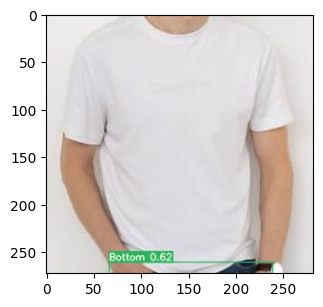

In [ ]:
# Search for GREEN
plt.figure(figsize = (20, 10))
show_selected_images(images, COLORS['GREEN'], 60, 5)

In [ ]:
# Search for YELLOW
plt.figure(figsize = (20, 10))
show_selected_images(images, COLORS['YELLOW'], 60, 5)

<Figure size 2000x1000 with 0 Axes>

In [2]:
colors = ['#e7e8ea, #7a4d44, #33211d, #a59e9e, #cdd0d3', '#e8d970, #f4f5f6, #552f1e, #cdb73f, #8e5f3c', '#f0f1f3, #1e1412, #b8bcbc, #cbd3da, #78543c']
[[col[1:] for col in col_sec.split(', ')]for col_sec in colors]

[['e7e8ea', '7a4d44', '33211d', 'a59e9e', 'cdd0d3'],
 ['e8d970', 'f4f5f6', '552f1e', 'cdb73f', '8e5f3c'],
 ['f0f1f3', '1e1412', 'b8bcbc', 'cbd3da', '78543c']]